# Welcome to Histogram Heaven

In [1]:
import uproot as ur
import uproot_methods as urm
import awkward
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Open the ntuple

In [2]:
sm_file = ur.open("../user.jagrundy.20736236._000001.MiniNTuple.root")
sm_tree = sm_file['XhhMiniNtuple']
branches = sm_tree.arrays(branches=[
    'resolvedJets_HadronConeExclTruthLabelID',
    'resolvedJets_is_DL1r_FixedCutBEff_77'], namedecode='utf-8')
table = awkward.Table(branches)

# convenience
table['truth'] = table['resolvedJets_HadronConeExclTruthLabelID']==5
table['tag'] = table['resolvedJets_is_DL1r_FixedCutBEff_77']==1


Get number of bjets, number of jets overall, number of tagged jets, and filter

In [3]:
table['nbjets'] = awkward.AwkwardArray.count_nonzero(table['truth'])

table['njets'] = awkward.AwkwardArray.count(table['truth'])

table['nbtags'] = awkward.AwkwardArray.count_nonzero(table['tag'])

# "untagged" = jet (not necessarily real) but not tagged
table['n_untagged'] = awkward.AwkwardArray.count_nonzero(table['tag']==0)

# filter table so we're looking at events with exactly 3 tags
table = table[table.nbtags == 3]


Make those histograms

<Figure size 432x288 with 0 Axes>

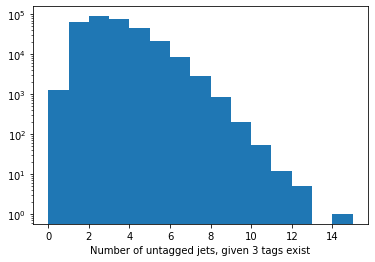

In [4]:
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(table.n_untagged, bins=np.max(table.n_untagged)-np.min(table.n_untagged))
plt.yscale('log')
plt.xlabel('Number of untagged jets, given 3 tags exist')
plt.show()
